# Basic and Brief code suited for Text processing

In this very short notebook, the aim is to experiment and determine whether text processing such as tokenisation , stop word processing etc. can be applied at a larger scale

We begin by importing some of the needed packages:

In [5]:
#importing wanted libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here we read in the 'Comments' Dataset and work with only subset of the data


In [7]:
comments = pd.read_excel("../data/C4Comments.xlsx")
comments.head(n=10)

,Comment_ID,course_id,Timestamp,user,Question_ID,Comment
0,7197674,21320,2020-04-30 19:57:28,635978,4470201,"This is a good question, i do think it's a lit..."
1,7197679,21320,2020-04-30 20:00:46,635978,4468999,"This is a really good question, i like the str..."
2,7199285,21320,2020-05-01 15:43:35,636026,4471345,It is a good question. Slightly tricky but not...
3,7202419,21320,2020-05-03 13:28:57,635990,4472540,I think this is a really good question! I thin...
4,7202425,21320,2020-05-03 13:34:57,635990,4472481,This question requires the students to recall ...
5,7202447,21320,2020-05-03 13:52:47,635990,4472418,This question requires quite specific and deta...
6,7202548,21320,2020-05-03 16:38:30,636007,4468332,I think this question was quite good. The ques...
7,7204388,21320,2020-05-04 16:43:37,636020,4468400,I like the style of this question in having to...
8,7204405,21320,2020-05-04 16:54:47,636020,4469950,I think this question would benefit from rewor...
9,7205230,21320,2020-05-05 00:09:07,635993,4475427,"This question is very easy, while it is very r..."


### Key observations:

From this brief snapshot we can observe a couple of things:
- the respective `Comment_ID`
- the `course_id` and `Timestamp` variables (not pertinent to this current analysis)
- The corresponding `Question_Id` 
- The most pertinent column: `Comment`


- In the comments column we can straight away observe that there are a few "stop words" we can immediately clean up such as:
  - I, is, a, the, to
  - 'Question', think, having

- The words of interest could possibly be:
  - easy, hard, good ,bad, tricky
  - recall
  - **Actionable words**:
    - benefit, rewording, misleading, confusing, difficult
    - suggest


- We will also need to find the root words/ words that have similiar meaning to eachother

In [8]:
comments['Comment'].head(n=30)

0     This is a good question, i do think it's a lit...
1     This is a really good question, i like the str...
2     It is a good question. Slightly tricky but not...
3     I think this is a really good question! I thin...
4     This question requires the students to recall ...
5     This question requires quite specific and deta...
6     I think this question was quite good. The ques...
7     I like the style of this question in having to...
8     I think this question would benefit from rewor...
9     This question is very easy, while it is very r...
10    I liked this question, however i was unsure of...
11    This question is good but only tests basic rec...
12    The question was straight-forward and requires...
13    The question has plausible options that are wo...
14    The question was a bit difficult, which is goo...
15    It would be really helpful if you further expl...
16    I think option C is quite misleading; I chose ...
17    I think this question is worded a bit conf

## Preliminary text transformation

Here I will cast each row in the `comments['Comment]` column to a string as a pre-step to tokenisation.

In [9]:
# Convert to list
comments_ls = comments['Comment'].tolist()

# viewing an example:
comments_ls[100]



'When reading this question I got too distracted by reading the table options an trying to figure out which columns are correct and incorrect that I forgot to read the actual question again. Whoops!! Now that I read the question again the correct answer makes sense and is quite easy to identify through process of elimination of the other answers. This question requires students to apply their knowledge in a situation where the sigma subunit is impaired. The fact that you said "impaired" rather than not present at all makes the question more challenging. The transcription occurs (Yes/No) column could be a bit confusing but also allows the elimination of A and D as students that are confident with the syllabu content will know that the sigma subunit is involved in the initiation of prokaryotic transcription. This question could be changed into a "Which row of the table is True/False?" question or something along those lines which is similar to the style of exam questions.'

### Key Observations:
From this example we can observe the following things, the author of this particular comment has implemented:
- brackets/ parentheses ()
- Quotation marks " " , this also differs comment to comment- some are enclosed by ' ' and others " "
- Punctuation marks like commas, fullstops, exclamation points, question marks
- There are a few spelling errors
- These comments are quite long and dense 
- Important words to consider are:
  "distracted"
  "confusing"
- Distinction needs to be made between answer options (A, B, C, D) and stop words/ words at the beginning of the sentence like 'a' and 'A' if capitalised

# Next Steps

The next steps would be to build or find functions where we tokenise the most valuable words - that relate to the aims of the core.

As well as remove any noise from the text- punctuation, latex or HTML formatting.

Then assign some statistical weighting to these words.



# Clustering

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import pandas as pd

In [21]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(comments['Comment'].values)
features = vec.transform(comments['Comment'].values)
print(features)

  (0, 4477)	0.23082270247815384
  (0, 4377)	0.2407112127365184
  (0, 4086)	0.11029006260241306
  (0, 3884)	0.23988110111576216
  (0, 3734)	0.2986201634527109
  (0, 3701)	0.2230950869677792
  (0, 3654)	0.20587523499203628
  (0, 3632)	0.29616804697767724
  (0, 3227)	0.1306850828164136
  (0, 3161)	0.11486170338434659
  (0, 2774)	0.10190353113581616
  (0, 2437)	0.1558761333247369
  (0, 2408)	0.19862107474722387
  (0, 2357)	0.17065112979363925
  (0, 2330)	0.26033762067894867
  (0, 2010)	0.2518495260589486
  (0, 1966)	0.24691967415405636
  (0, 1806)	0.09394148663726909
  (0, 1516)	0.12112663795981
  (0, 656)	0.1833630226123111
  (0, 499)	0.288966891633032
  (0, 416)	0.26735918248310286
  (0, 266)	0.1105726959793744
  (1, 3866)	0.4657596418397602
  (1, 3227)	0.5289781370075621
  :	:
  (2225, 3161)	0.11250148266396126
  (2225, 2791)	0.35716149398918307
  (2225, 2626)	0.5481392742682492
  (2225, 2107)	0.20080533848272353
  (2225, 2019)	0.31724334429323714
  (2225, 1320)	0.30044247778857736
  (2

In [95]:
km = MiniBatchKMeans(n_clusters=3, random_state=0)
km.fit(features)

MiniBatchKMeans(n_clusters=3, random_state=0)

In [97]:
predictions = km.predict(features)

In [98]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 

pca = PCA(n_components=2, random_state=0)
lowerdim_features = pca.fit_transform(features.toarray())

reduced_centers = pca.transform(km.cluster_centers_)

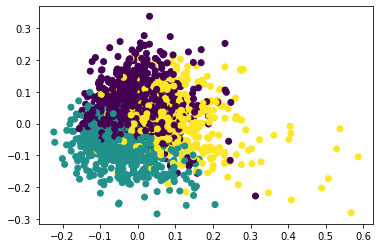

In [99]:
plt.scatter(lowerdim_features[:,0], lowerdim_features[:,1], c=km.predict(features))

In [107]:
clustered_comments = pd.DataFrame({"Comment" : comments["Comment"], "Cluster" : predictions})
pd.set_option('display.max_colwidth', -1)
clustered_comments[clustered_comments['Cluster'] == 1].head()

,Comment,Cluster
2,It is a good question. Slightly tricky but not too tricky. Good level.,1
8,"I think this question would benefit from rewording as it is unclear what it is asking. For example, the process of elongation could be mentioned in the stem and the fact that it is asking about the first base in RNA elongation could be clearer. An example of a way you could do this is ""In which nucleic acid is the first base during elongation A or G?"". I think it's good you included the which cell type part and you should incorporate that still into your edited question.",1
11,"This question is good but only tests basic recall. However, it is a very specific bit of information and there are a few good distractors in the options which makes it more difficult for a student who doesn't remember transcriptional termination immediately.",1
12,The question was straight-forward and requires memory to answer. Perhaps this could be made more difficult by requiring us to apply the knowledge of RNA and DNA error rates,1
15,"It would be really helpful if you further explain your reasoning in choosing D as the answer. I thought that Rho proteins and the hairpin loop are what can cause transcription to end. Would you be able to further explain what you mean by factors/signals, as this is a little unclear? I especially don't understand how factors/signals could cause there to be a hairpin loop, since this is encoded in the DNA/RNA. Perhaps you could expand on your reasoning in the answers so students could better understand?",1


In [108]:
clustered_comments[clustered_comments['Cluster'] == 0].head()

,Comment,Cluster
5,"This question requires quite specific and detailed recollection about Trp attenuation, I think many students won't remember this and hence, only those who have studied very hard and remember the process well might know the answer. I got the question wrong and was hoping for perhaps a more detailed explanation of how attenuation works and why A,C,D were incorrect/why B was correct. I think this would be really helpful for those who got the question wrong.",0
7,"I like the style of this question in having to recognise the reason why the rifampicin is an inhibitor and what process it affects. However, I don't think the included diagram is necessary for the question and I am unsure what it adds. I think this question can be answered with just the text in the stem. Maybe include an explanation of how the diagram can assist with answering the question to link it to the question. Additionally, I think some of the options could be worded to be clearer, for example for option B, it could be rewritten as ""inhibits pre-mRNA adding nucleotides which causes inability to process RNA synthesis"".",0
13,"The question has plausible options that are worded quite similarly and can distract from the correct answer. The question just requires memory, maybe the question could be enhanced by adopting a cause-and-effect approach",0
14,"The question was a bit difficult, which is good, but I think option E does not need to be there and I think the answer stood out from the options because it is longer than the others and is the only option that talks about the 'sequence' while the others only talk about the 'protein'. If some other options are able to be based on the 'sequence' then that will make the question more difficult",0
16,"I think option C is quite misleading; I chose C because it says ""Bacterial promoter sequences are OFTEN located upstream of the start site."" when promoters are always located upstream of the start site to my knowledge. I think you might need to change it to 'always', otherwise you could argue C is incorrect as well. Other than that, your explanation of the answers is very clear and well written, which I think helps students understand what they did wrong. Similarly, your question is worded in an easy to understand way.",0


In [109]:
clustered_comments[clustered_comments['Cluster'] == 2].head()

,Comment,Cluster
0,"This is a good question, i do think it's a little bit wordy with the options which can be a give away as to what the answer is so maybe making shorter and sound slightly similar can be a bit more challenging otherwise i like the style of the question and i really like how you've included an image in the explanation! :)",2
1,"This is a really good question, i like the structure and a very in depth explanation which is really good!",2
3,"I think this is a really good question! I think it's a really good way to test our ability to apply knowledge about the sigma subunit, not just recall knowledge. I also really like your explanation, it makes it really easy to understand why the other options are incorrect and D is correct. Also, the question is phrased in an interesting and easy to understand way, which is great. This question is specific enough to catch a lot of students out, but not too specific that it tests a really minor or irrelevant point.",2
4,"This question requires the students to recall information about the Trp operon, so there isn't much application required to answer this question. I think it's a good question, but you could possibly include some better distractors/misconceptions to make the question more difficult? I think the explanation is written really clearly, making it easy for students to understand what they did wrong. Similarly, the question and options are written really clearly so students can understand what is required of them in this question.",2
6,"I think this question was quite good. The question was clear and easy to read, and the options were well written. Your explanation was great!",2
